In [3]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Define directories
root_dir = os.path.abspath(r"dogs-vs-cats")
train_dir = os.path.join(root_dir, "train")
test_dir = os.path.join(root_dir, "test1")

# Set up ImageDataGenerators for loading images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 80% train, 20% validation
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    'dogs-vs-cats/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training',  
    shuffle=True
)

validation_generator = train_datagen.flow_from_directory(
    'dogs-vs-cats/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation',  # important!
    shuffle=True
)

# Build a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 669s 1s/step - accuracy: 0.5608 - loss: 0.7425 - val_accuracy: 0.6725 - val_loss: 0.6065
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 390s 624ms/step - accuracy: 0.6434 - loss: 0.6301 - val_accuracy: 0.7220 - val_loss: 0.5476
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1926s 3s/step - accuracy: 0.7016 - loss: 0.5681 - val_accuracy: 0.7366 - val_loss: 0.5303
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 384s 615ms/step - accuracy: 0.7226 - loss: 0.5426 - val_accuracy: 0.7506 - val_loss: 0.5042
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 393s 629ms/step - accuracy: 0.7489 - loss: 0.5045 - val_accuracy: 0.7616 - val_loss: 0.4919
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 414s 663ms/step - accuracy: 0.7587 - loss: 0.4919 - val_accuracy: 0.7760 - val_loss: 0.4777
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 397s 635ms/step - accuracy: 0.7707 - loss: 0.4829 - val_accuracy: 0.7770 - val_loss: 0.4

In [4]:
print("Train samples:", train_generator.samples)
print("Validation samples:", validation_generator.samples)
print("Class indices:", train_generator.class_indices)

Train samples: 20000
Validation samples: 5000
Class indices: {'cats': 0, 'dogs': 1}


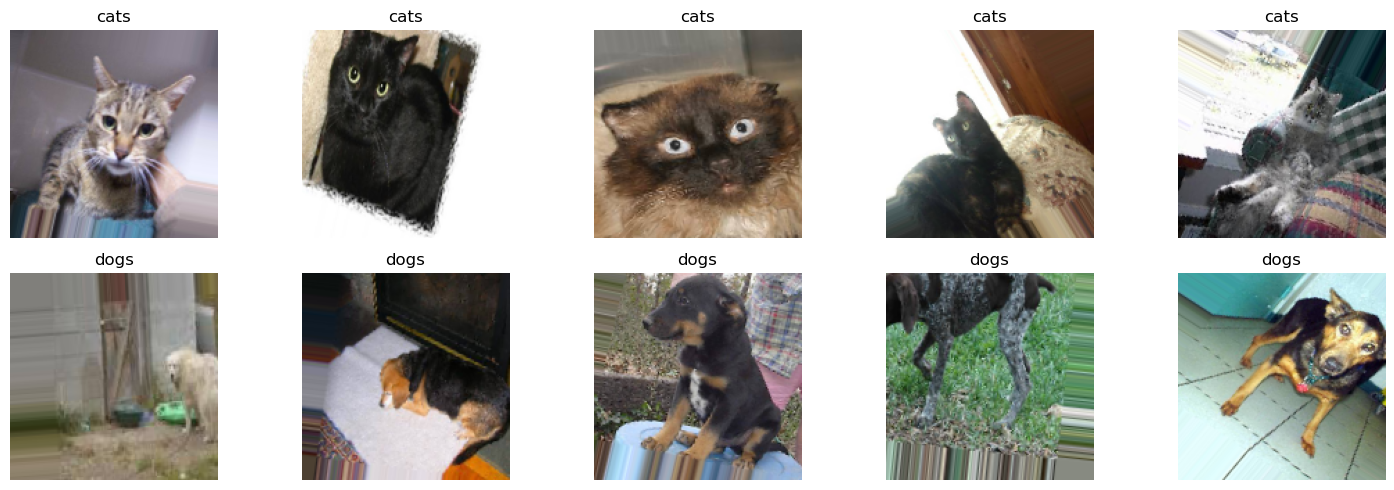

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of images and labels
images, labels = next(train_generator)

# Plot samples of cats and dogs
def show_samples(images, labels, class_names, num_samples=5):
    plt.figure(figsize=(15, 5))
    shown = 0
    for i in range(len(images)):
        label = int(labels[i])
        if shown >= num_samples * 2:
            break
        if (label == 0 and shown < num_samples) or (label == 1 and shown >= num_samples and shown < num_samples * 2):
            plt.subplot(2, num_samples, shown + 1)
            plt.imshow(images[i])
            plt.title(class_names[label])
            plt.axis('off')
            shown += 1
    plt.tight_layout()
    plt.show()

# Class labels based on the generator's class indices
class_names = list(train_generator.class_indices.keys())

show_samples(images, labels, class_names)
